In [2]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
import urllib.request #to download image from internet
import cv2

In [3]:
from keras.models import load_model
cnn=load_model('CNN_final.h5')

In [4]:
face_cascade=cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

# Turning on the webcam to identify my face

In [17]:
label=['Not Sang', 'Sang']
color_label=[(0,0,255),(0, 255, 0)]

In [119]:
cap = cv2.VideoCapture(0)
while True:
    ret, frame= cap.read()
    gray=cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    face=face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=10)
    for(x,y,w,h)in face:
        roi_gray=gray[y:y+h, x:x+w]
        roi_gray=cv2.resize(roi_gray,(150,150))
        cv2.imwrite("data.png",roi_gray)
        roi_gray=cv2.imread('data.png')
        i=cnn.predict(np.array([roi_gray])).argmax()
        #do sth
        cv2.rectangle(frame, (x, y), (x + w, y + h), color_label[i], 5)
        cv2.putText(frame, label[i], (x,y), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255) )
    
    cv2.imshow('cak', frame)
    if cv2.waitKey(20) & 0xFF == ord('q'):
        break

In [120]:
cap.release()
cv2.destroyAllWindows()

# Use our trained model to detect some others's picture

In [48]:
def download_image_ipg(url, file_path, file_name):
    fullpath=file_path+file_name+".png"
    urllib.request.urlretrieve(url,fullpath)

In [95]:
url='https://scontent-hkg4-1.xx.fbcdn.net/v/t1.0-9/16114520_663489760489586_1511141326445874156_n.jpg?_nc_cat=106&ccb=2&_nc_sid=174925&_nc_ohc=EyUKUV41DuwAX_fLEfH&_nc_ht=scontent-hkg4-1.xx&oh=965e41f3df307cf55b164de579bebe32&oe=5FEFB2B2'
download_image_ipg(url,'', 'data2')

In [128]:
img=cv2.imread('data2.png')

In [129]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
faces = face_cascade.detectMultiScale(gray, 10, 4)
#
for (x, y, w, h) in faces:
    print(x,y,w,h)
    roi_gray=gray[y:y+h, x:x+w]
    roi_gray=cv2.resize(roi_gray,(150,150))
    cv2.imwrite("data.png",roi_gray)
    roi_gray=cv2.imread('data.png')
    i=cnn.predict(np.array([roi_gray])).argmax()
    cv2.rectangle(img, (x, y), (x + w, y + h), color_label[i], 5)
    cv2.putText(img, label[i], (x,y), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255) )

249 211 240 240


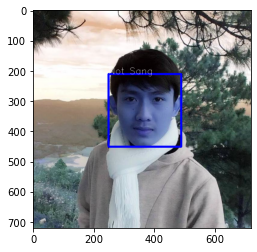

In [130]:
plt.imshow(img)

In [131]:
cv2.imwrite("data.png",img)

True